In [1]:
import streamlit as st
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from datetime import datetime as dt

import folium
from streamlit_folium import st_folium

2026-01-28 14:13:55.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [2]:
df_sample = pd.read_csv("citibike_sample_twice_2.5.csv")

In [3]:
df_sample[['month']]

,month
0,2022-01
1,2022-01
2,2022-01
3,2022-01
4,2022-01
...,...
30190,2022-12
30191,2022-12
30192,2022-12
30193,2022-12


In [4]:
df_sample['month_num'] = pd.to_datetime(df_sample['month']).dt.month

In [5]:
# Create the season column

df_sample['season'] = [
    "winter" if month in [12, 1, 2, 3, 4]
    else "spring" if month in [5, 6]
    else "summer" if month in [7, 8, 9]
    else "fall"
    for month in df_sample['month_num']
]
    

In [6]:
df_stations = (
    df_sample.groupby('start_station_name')['value']
      .count()
      .reset_index()
)


In [7]:
# top 20 most frequented stations
top20 = df_stations.nlargest(20, 'value')

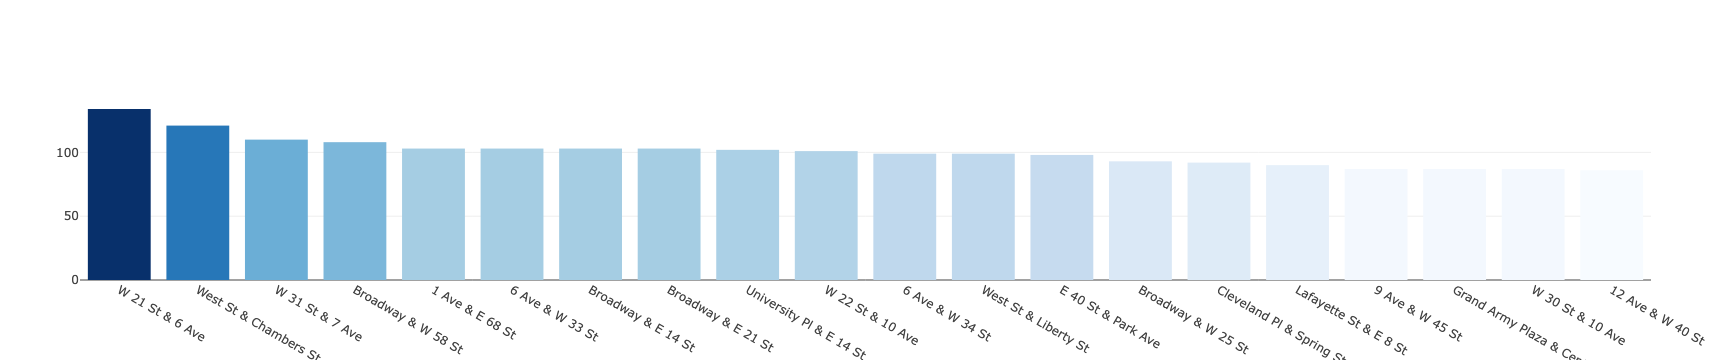

In [8]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Blues'}))
fig.show()

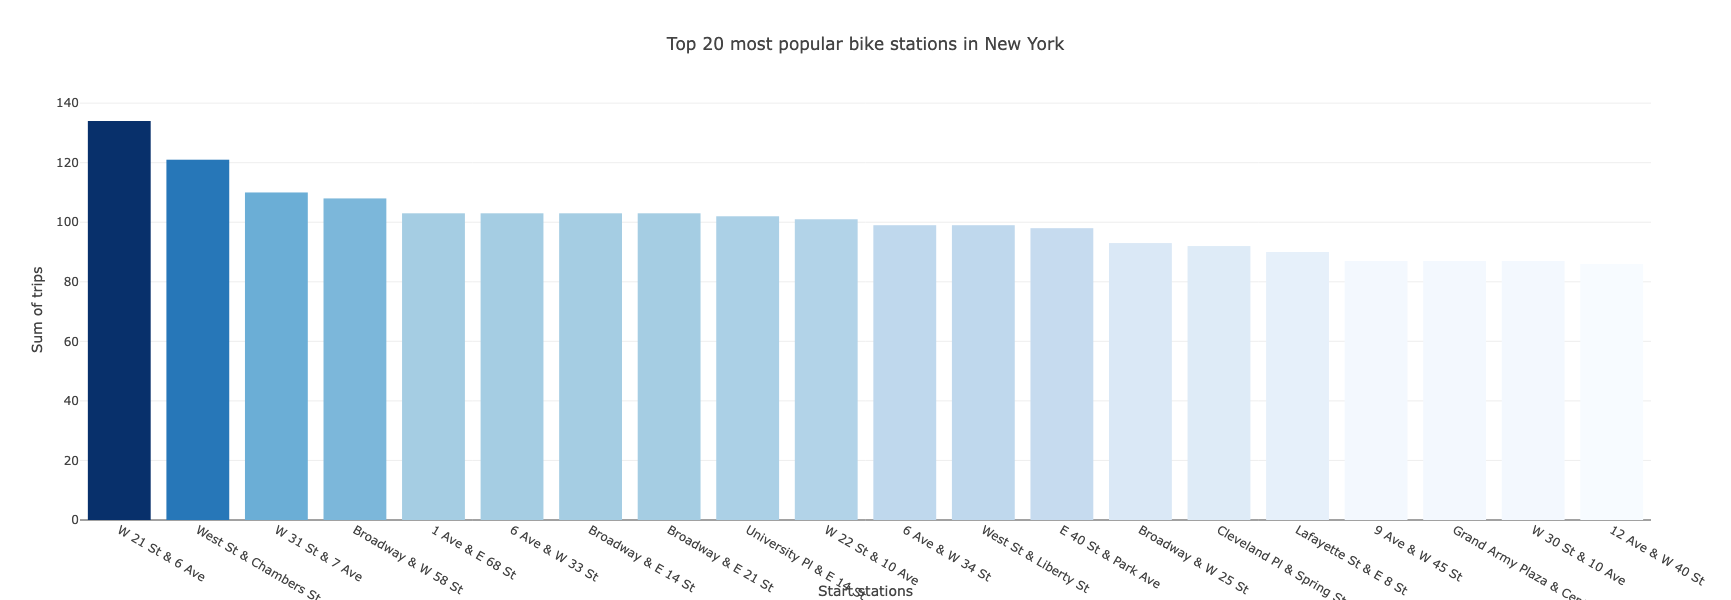

In [9]:
fig.update_layout(
    title = 'Top 20 most popular bike stations in New York',
    xaxis_title = 'Start stations',
    yaxis_title ='Sum of trips',
    width = 900, height = 600
)

In [10]:
df_sample.columns


Index(['day', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'year_month', 'bike_rides_daily',
       'merge_test', 'value', 'month', 'month_num', 'season'],
      dtype='object')

In [11]:
df_sample.head()


,day,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,end_lng,member_casual,avgTemp,year_month,bike_rides_daily,merge_test,value,month,month_num,season
0,2022-01-23,A67414E5E180D575,electric_bike,2022-01-23 17:51:35.757,2022-01-23 17:58:24.629,Butler St & Court St,4339.01,President St & Henry St,4307.13,40.684989,...,-73.999904,casual,-0.7,2022-01,340,both,1,2022-01,1,winter
1,2022-01-28,0E58DB6EE3FA2E29,classic_bike,2022-01-28 17:53:57.406,2022-01-28 18:32:39.033,48 St & Broadway,6629.06,Broadway & W 58 St,6948.10,40.755763,...,-73.981693,member,0.1,2022-01,347,both,1,2022-01,1,winter
2,2022-01-21,A392C6A481E043EE,electric_bike,2022-01-21 15:48:45.574,2022-01-21 15:53:56.843,28 St & 36 Ave,6614.01,34 St & 38 Ave,6453.02,40.757186,...,-73.929737,member,-6.0,2022-01,360,both,1,2022-01,1,winter
3,2022-01-12,CE817064BA5914C5,classic_bike,2022-01-12 07:46:01.804,2022-01-12 07:54:50.785,E 93 St & 2 Ave,7286.02,E 77 St & 3 Ave,7092.06,40.782454,...,-73.958562,member,-1.9,2022-01,412,both,1,2022-01,1,winter
4,2022-01-06,C89F02D730EC74B6,electric_bike,2022-01-06 20:09:10.109,2022-01-06 20:20:49.733,6 Ave & Broome St,5610.09,Vesey Pl & River Terrace,5297.02,40.724310,...,-74.016584,casual,4.9,2022-01,439,both,1,2022-01,1,winter


In [12]:
df_sample.dtypes


day                    object
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
year_month             object
bike_rides_daily        int64
merge_test             object
value                   int64
month                  object
month_num               int32
season                 object
dtype: object

In [13]:
print('date' in df_sample.columns)  # False vermutlich


False


In [14]:
# Index als Spalte zurückholen
df_sample = df_sample.reset_index()  # Jetzt gibt es df_sample['day']

# date-Spalte aus day erstellen
df_sample['date'] = pd.to_datetime(df_sample['day'])



In [15]:
print(df_sample[['day','date']].head())


          day       date
0  2022-01-23 2022-01-23
1  2022-01-28 2022-01-28
2  2022-01-21 2022-01-21
3  2022-01-12 2022-01-12
4  2022-01-06 2022-01-06


In [16]:
df_sample = df_sample.sort_values('date')


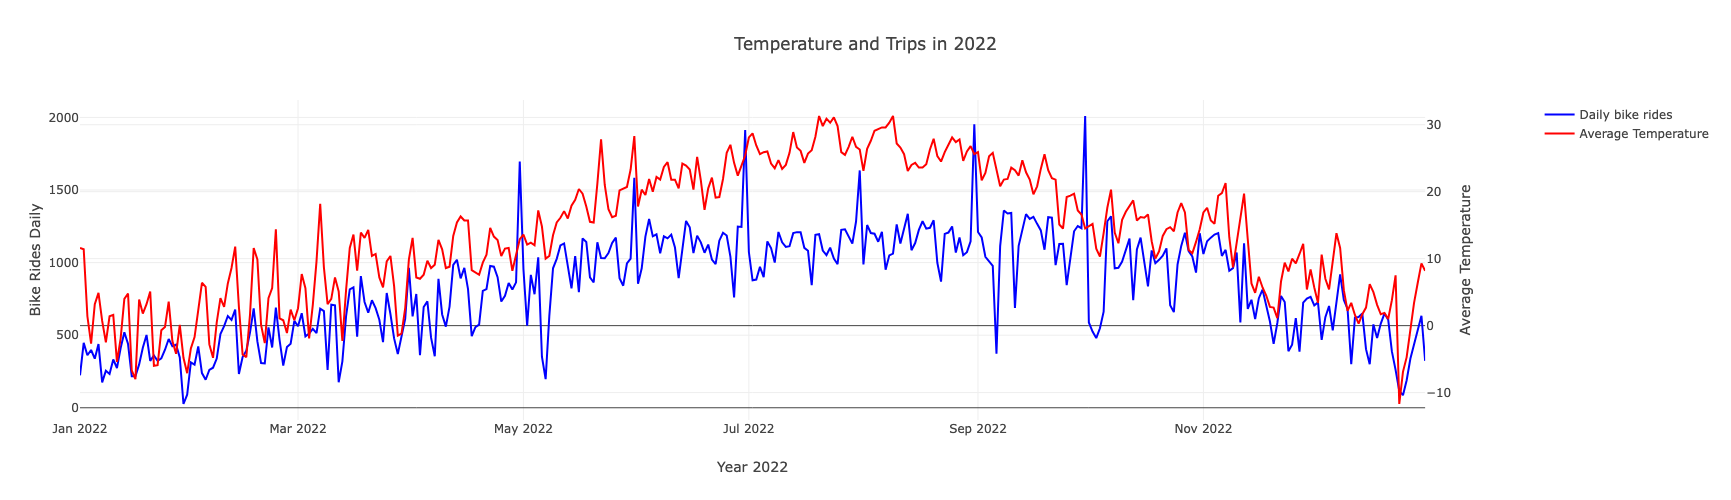

In [17]:

# -------------------------
# 3️⃣ Dual-Axis Plot
# -------------------------
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Daily bike rides
fig.add_trace(
    go.Scatter(
        x=df_sample['date'],
        y=df_sample['bike_rides_daily'],
        name='Daily bike rides',
        line=dict(color='blue')
    ),
    secondary_y=False
)

# Average Temperature
fig.add_trace(
    go.Scatter(
        x=df_sample['date'],
        y=df_sample['avgTemp'],
        name='Average Temperature',
        line=dict(color='red')
    ),
    secondary_y=True
)

# Achsentitel
fig.update_xaxes(title_text="Year 2022")
fig.update_yaxes(title_text="Bike Rides Daily", secondary_y=False)
fig.update_yaxes(title_text="Average Temperature", secondary_y=True)

# Plot-Titel
fig.update_layout(title_text="Temperature and Trips in 2022", width=900, height=500)

# Plot anzeigen
fig.show()


In [18]:
df_sample.columns

Index(['index', 'day', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'year_month', 'bike_rides_daily',
       'merge_test', 'value', 'month', 'month_num', 'season', 'date'],
      dtype='object')

In [19]:
df_sample_small = df_sample.drop(columns = {'ride_id', 'start_station_id', 'end_station_id', 'merge_test'}) 

In [20]:
df_sample_small.to_csv("citibike_sample_reduced_2.6.csv")

In [21]:
top20.to_csv("top20_stations.csv")

In [22]:
df_sample_small.head()

,index,day,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,year_month,bike_rides_daily,value,month,month_num,season,date
651,651,2022-01-01,electric_bike,2022-01-01 06:28:49.256,2022-01-01 06:31:51.520,Henry St & Grand St,Norfolk St & Broome St,40.714211,-73.981095,40.717227,-73.988021,member,11.6,2022-01,224,1,2022-01,1,winter,2022-01-01
757,757,2022-01-01,electric_bike,2022-01-01 13:37:41.319,2022-01-01 13:48:39.823,Bergen St & Flatbush Ave,Henry St & Atlantic Ave,40.680945,-73.975673,40.690893,-73.996123,member,11.6,2022-01,224,1,2022-01,1,winter,2022-01-01
193,193,2022-01-01,classic_bike,2022-01-01 10:03:05.071,2022-01-01 10:11:44.325,Prospect Park SW & 16 St,Prospect Park SW & 16 St,40.657265,-73.974165,40.657265,-73.974165,member,11.6,2022-01,224,1,2022-01,1,winter,2022-01-01
951,951,2022-01-01,classic_bike,2022-01-01 14:08:52.435,2022-01-01 14:12:24.307,Broadway & W 142 St,Broadway & W 133 St,40.824686,-73.951947,40.819034,-73.956156,member,11.6,2022-01,224,1,2022-01,1,winter,2022-01-01
975,975,2022-01-01,electric_bike,2022-01-01 03:40:45.840,2022-01-01 03:46:38.566,Howard St & Lafayette St,LaGuardia Pl & W 3 St,40.719105,-73.999733,40.729170,-73.998102,member,11.6,2022-01,224,1,2022-01,1,winter,2022-01-01


In [23]:
print(df_sample_small.columns.tolist())


['index', 'day', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'avgTemp', 'year_month', 'bike_rides_daily', 'value', 'month', 'month_num', 'season', 'date']
